In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import math

In [2]:
data=[]
element =[0,[0]]

with open('shoulder_60s.txt') as f:
    line = f.readline()
    while line:
        if (line.find("1") == 0):
            element[0]=int(line.strip())
            line = f.readline()
            if (line.find("[") == 0):
                stripped_line = line[1:].strip()
                line = f.readline()
                while (line.find("]") == -1):
                    stripped_line += " "+line.strip()
                    line = f.readline()
                if (line.find("]") > 0):
                    stripped_line += " "+line[:-2].strip()
                    element[1] = [float(k) for k in stripped_line.split()]
                    data.append(element.copy())
                    line = f.readline()
            
                

In [3]:
datanr = len(data)
tendonnr = len(data[1][1])
print("Data Points: %i \nTendons: %i" % (datanr,tendonnr))

Data Points: 3819 
Tendons: 37


In [4]:
#first nonzero element
startindices = []
for t in range(tendonnr):
    startindices.append(next((i for i, x in enumerate([n[1][t] for n in data]) if x), None))

Not_none_values = filter(None.__ne__, startindices)
startindices = list(Not_none_values)


In [5]:
#start at specific index?
startindex = min(startindices)
#start some indices before?
endindex = datanr

#startindex=1000
#endindex=3000

pruneddata = data[startindex:endindex]

In [6]:
pruneddatanr = len(pruneddata)
print("Pruned Data starts at %i and ends at %i" % (startindex,endindex))
print("Pruned Data Points: %i" % pruneddatanr)

Pruned Data starts at 307 and ends at 3819
Pruned Data Points: 3512


0:7 are shoulder muscles
16 is triceps
17 is biceps

In [7]:
shoulder_idx=[0,1,2,3,4,5,6,7]

In [8]:
x = [m[0] for m in pruneddata]

#start x axis with 0
tmin = min([m[0] for m in pruneddata])
x = [t - tmin for t in x]

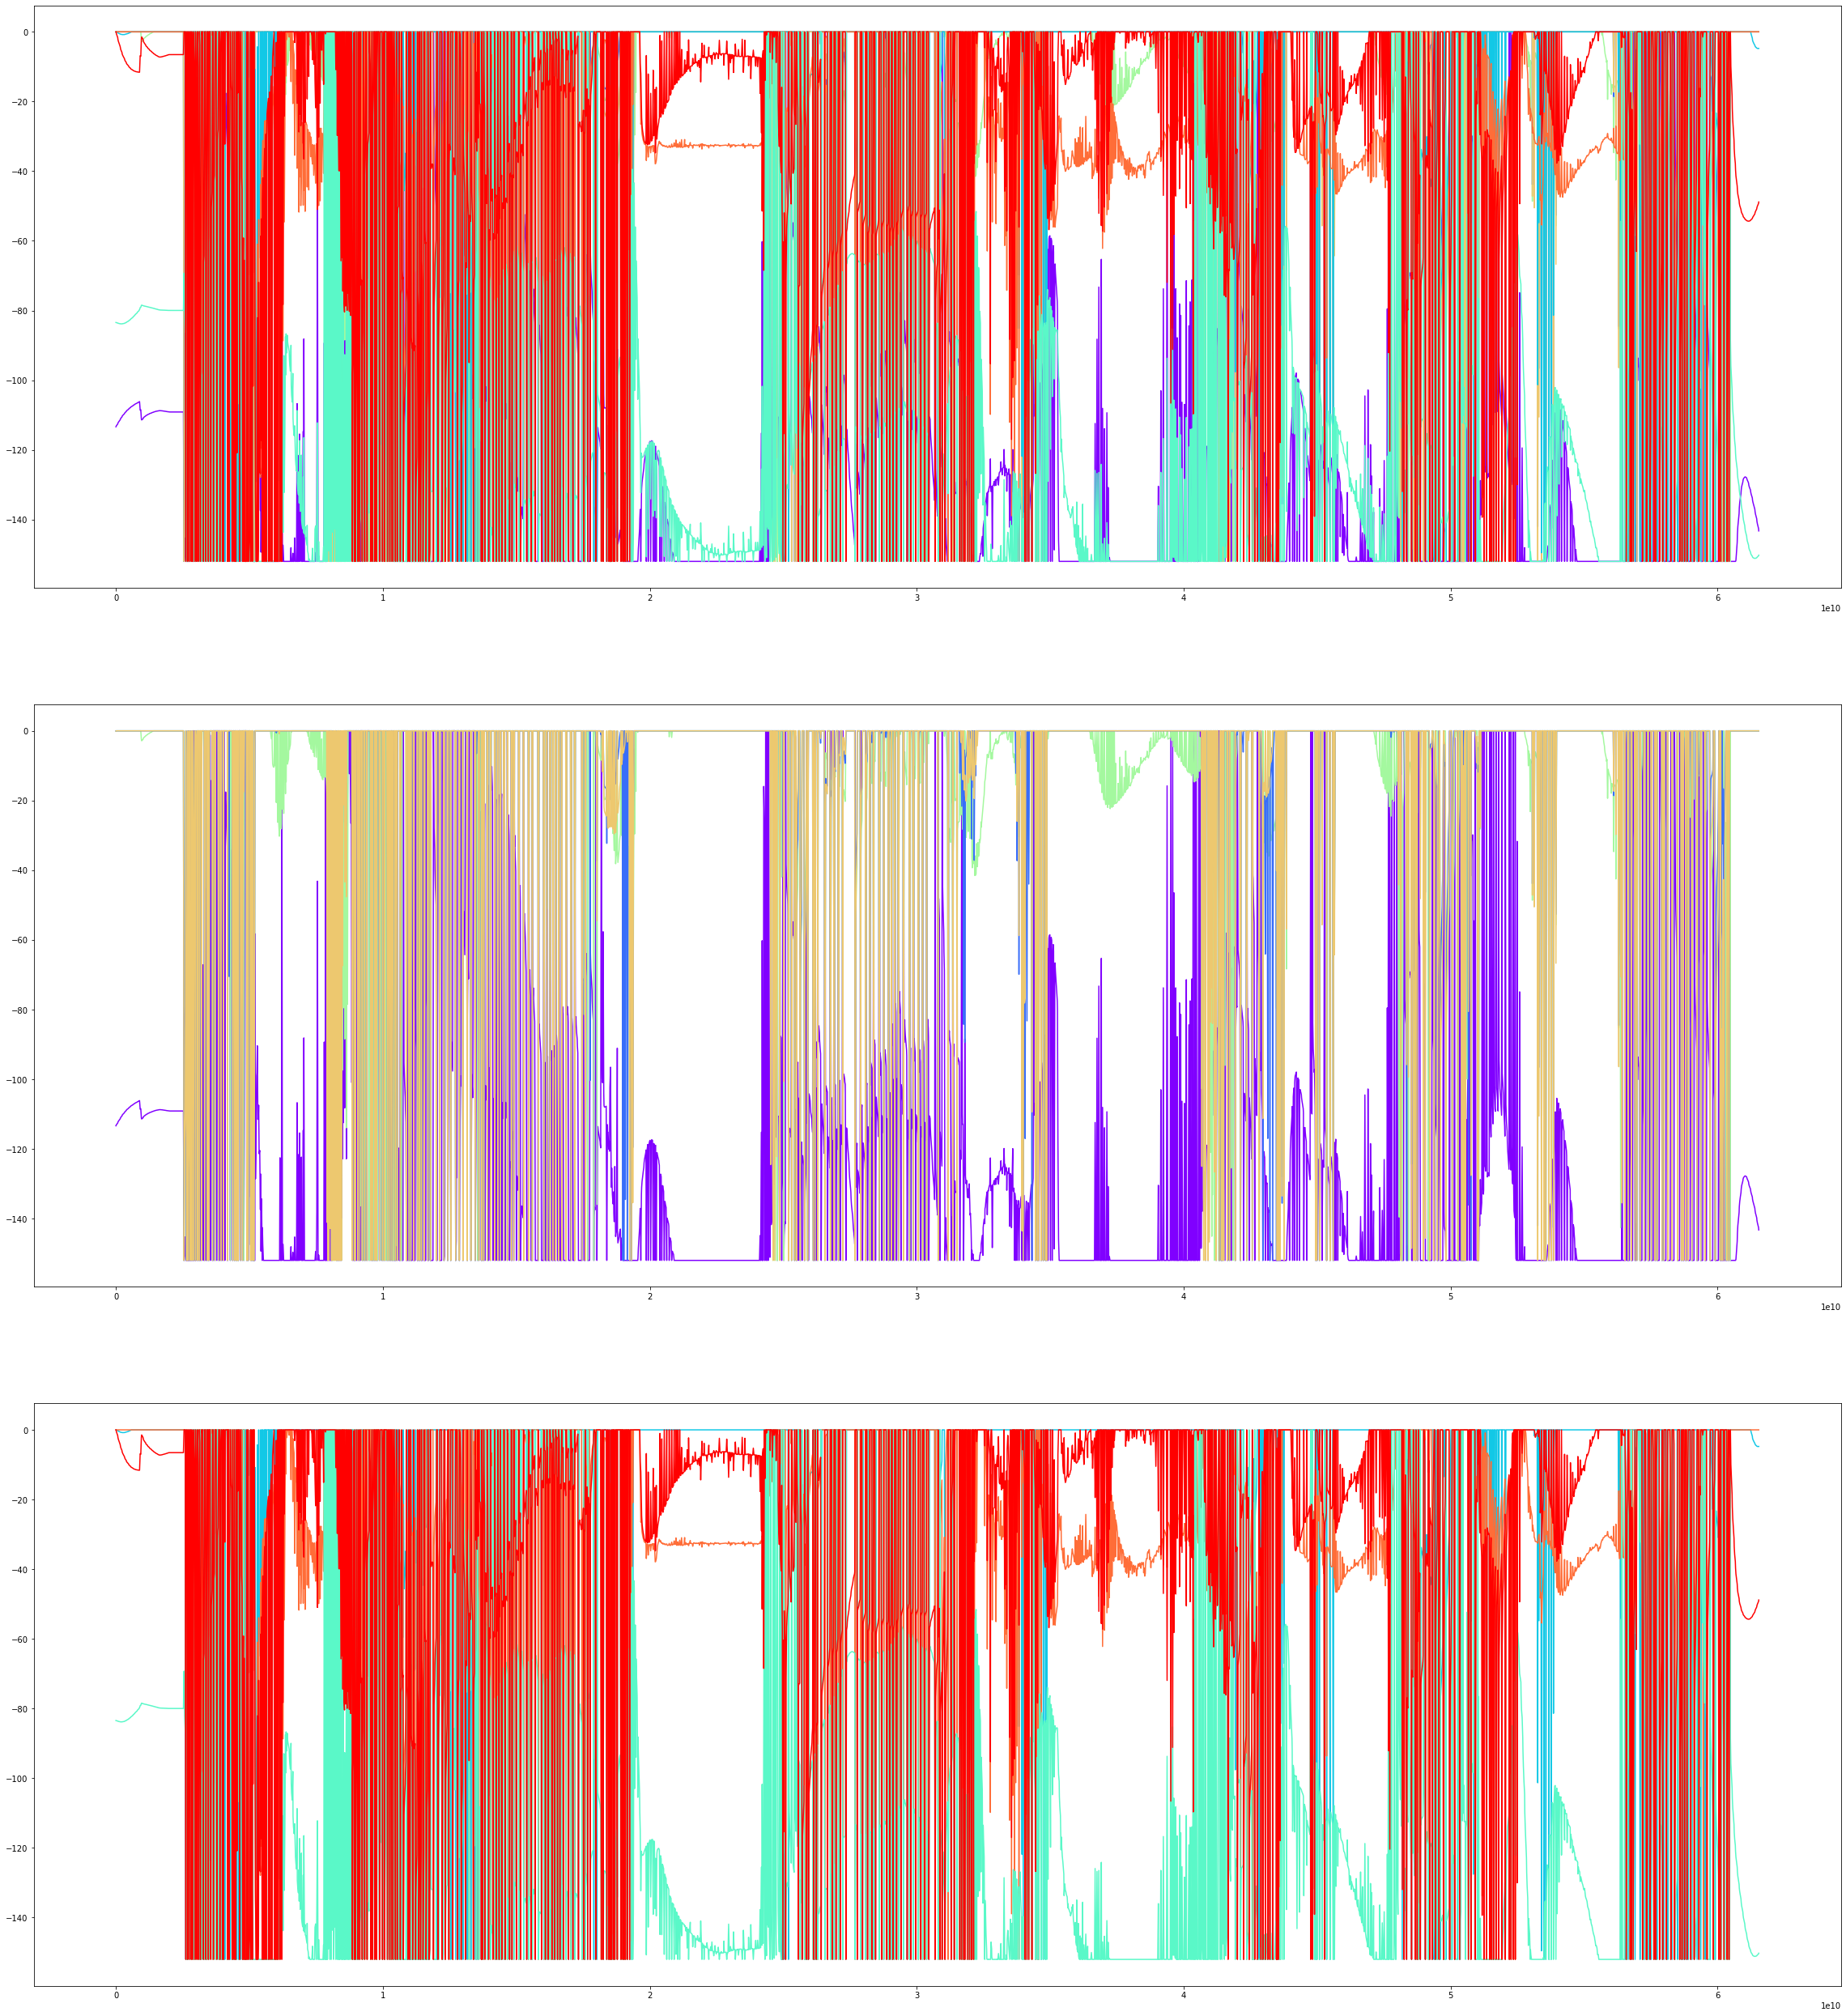

In [9]:
#plot shoulder left
#generate complementary colors
shoulder_color_pairs=math.ceil(len(shoulder_idx)/2)
shoulder_colors = cm.rainbow(np.linspace(0, 1, shoulder_color_pairs*2))
shoulder_colors_sorted=[]
for i in range(shoulder_color_pairs):
    shoulder_colors_sorted.append(shoulder_colors[i])
    shoulder_colors_sorted.append(shoulder_colors[i+shoulder_color_pairs])



fig_shoulder, axs_shoulder = plt.subplots(3)
fig_shoulder.set_size_inches(40, 15*3)

for u in shoulder_idx:
    axs_shoulder[0].plot(x,[n[1][u] for n in pruneddata],color=shoulder_colors_sorted[shoulder_idx.index(u)])

for u in shoulder_idx[:4]:
    axs_shoulder[1].plot(x,[n[1][u] for n in pruneddata],color=shoulder_colors_sorted[shoulder_idx.index(u)])

for u in shoulder_idx[4:]:
    axs_shoulder[2].plot(x,[n[1][u] for n in pruneddata],color=shoulder_colors_sorted[shoulder_idx.index(u)])
    
    
    
    

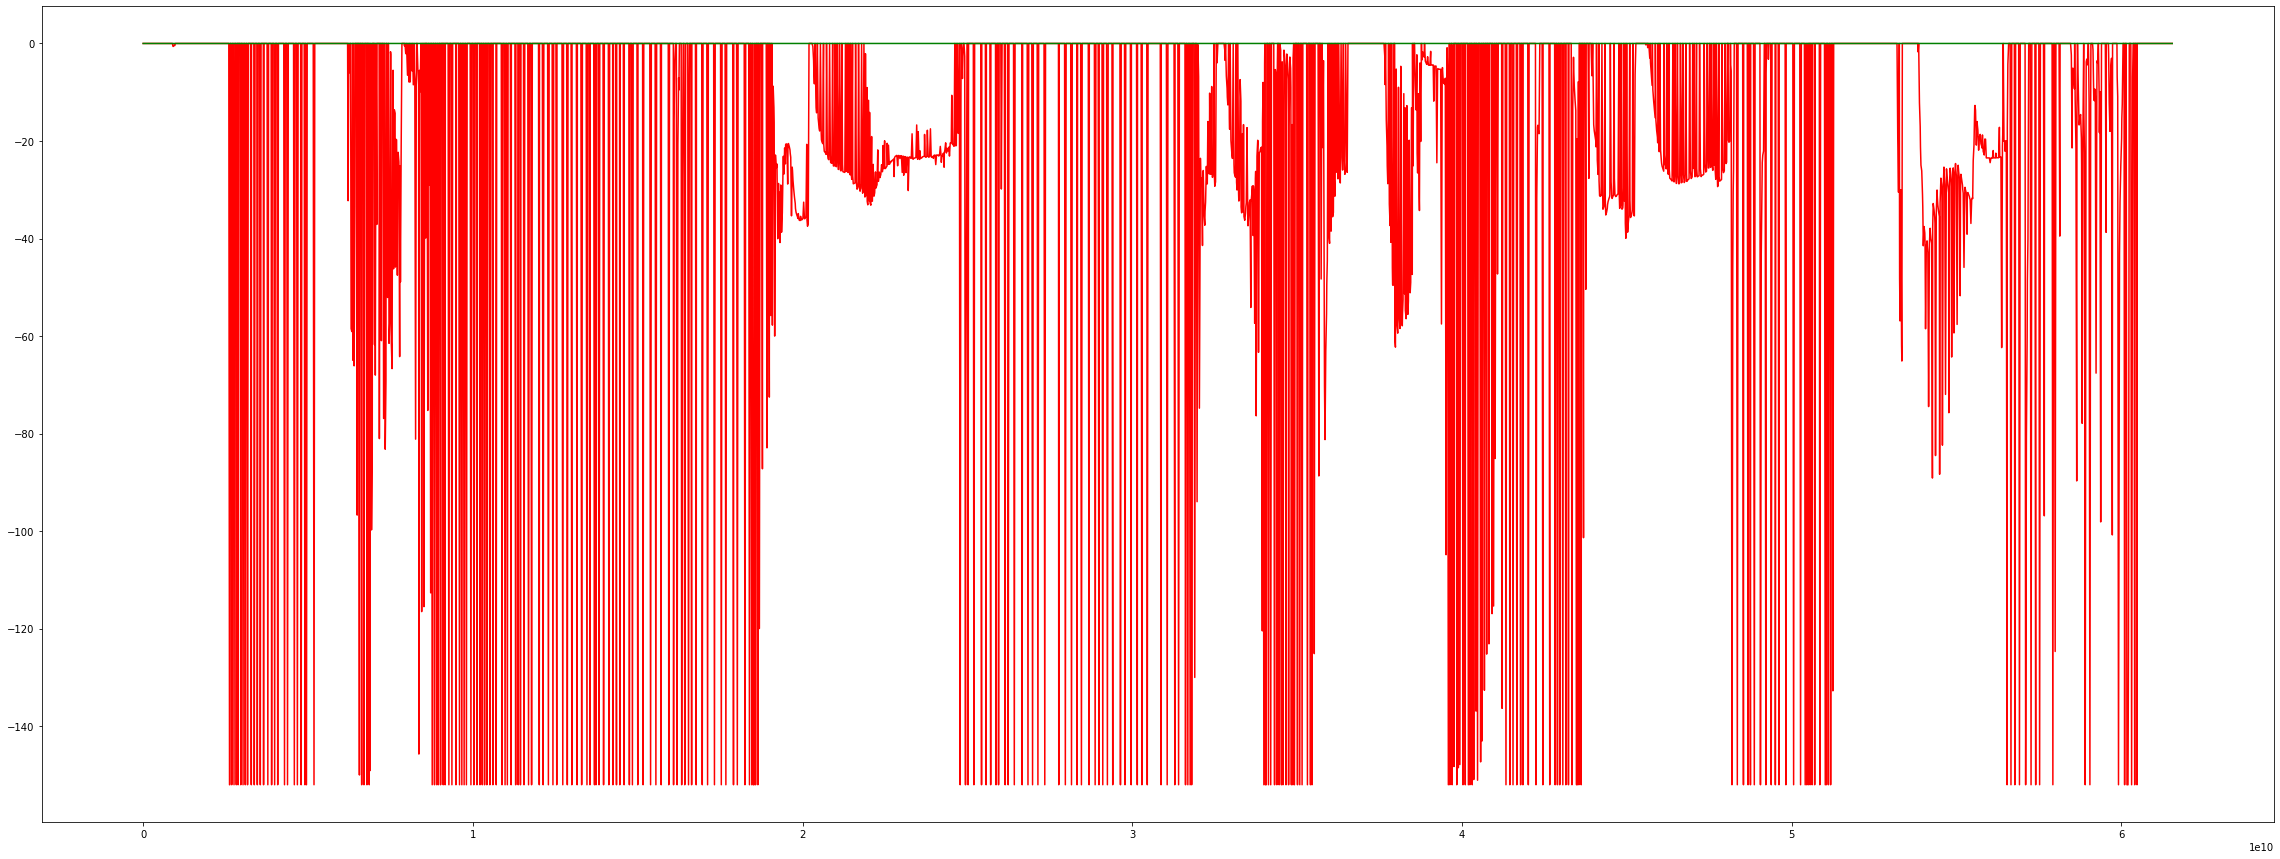

In [10]:
#plot biceps and triceps
A=plt.figure()
A.set_size_inches(40, 15)
plt.plot(x,[n[1][17] for n in pruneddata],color="red") #biceps red
plt.plot(x,[n[1][16] for n in pruneddata],color="green") #triceps green


#plot arm muscles
#generate complementary colors
arm_color_pairs=math.ceil(len(shoulder_idx)/2)
shoulder_colors = cm.rainbow(np.linspace(0, 1, shoulder_color_pairs*2))
shoulder_colors_sorted=[]
for i in range(shoulder_color_pairs):
    shoulder_colors_sorted.append(shoulder_colors[i])
    shoulder_colors_sorted.append(shoulder_colors[i+shoulder_color_pairs])




fig_up, axs_up = plt.subplots(upper_pairs+1)
fig_up.set_size_inches(40, 15*upper_pairs+1)

#full upper arm
for u in upperarm_idx:
    axs_up[0].plot(x,[n[1][u] for n in pruneddata], color=upper_colors[upperarm_idx.index(u)])
    

for l in range(upper_pairs):
    for u in upperarm_idx[l*2:l*2+2]:
        axs_up[l+1].plot(x,[n[1][u] for n in pruneddata], color=upper_colors[upperarm_idx.index(u)])
        
        
        
        
        
#plot lower left arm
lower_pairs=int(len(lowerarm_idx)/2)

fig_low, axs_low = plt.subplots(lower_pairs+1)
fig_low.set_size_inches(40, 15*lower_pairs+1)

#full lower arm
for u in lowerarm_idx:
    axs_low[0].plot(x,[n[1][u] for n in pruneddata])
    

for l in range(lower_pairs):
    for u in lowerarm_idx[l*2:l*2+2]:
        axs_low[l+1].plot(x,[n[1][u] for n in pruneddata])
    
